# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kruskal, mannwhitneyu
import seaborn as sns

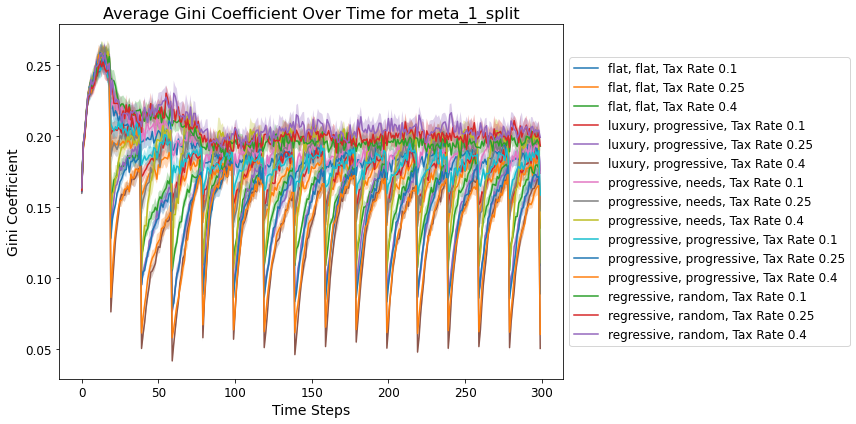

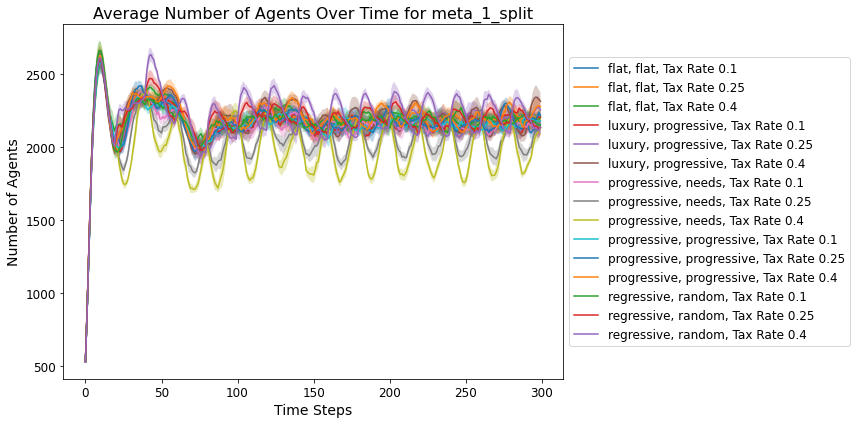

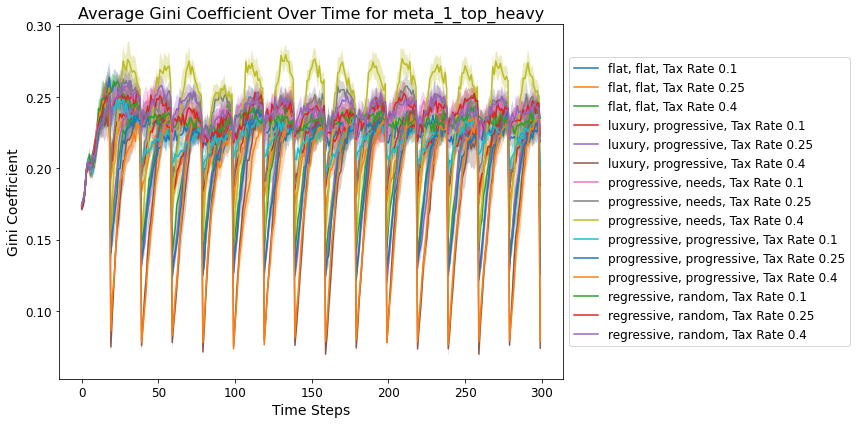

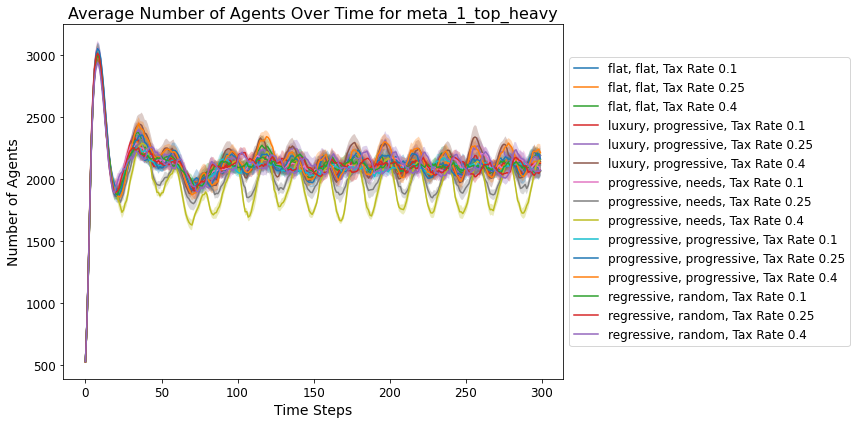

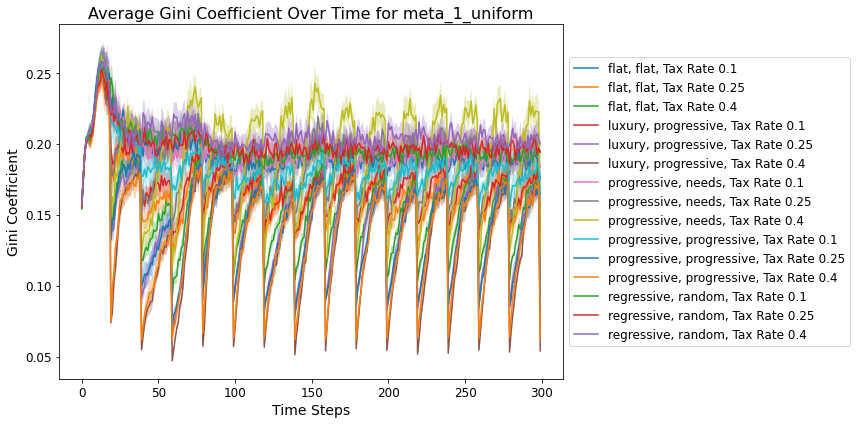

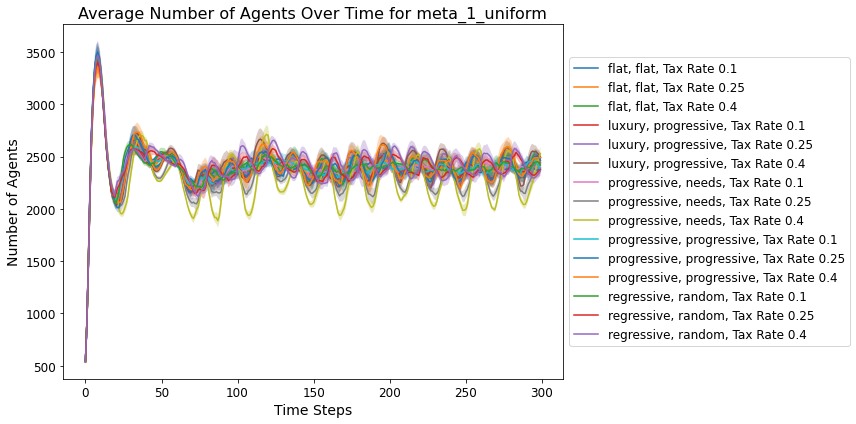

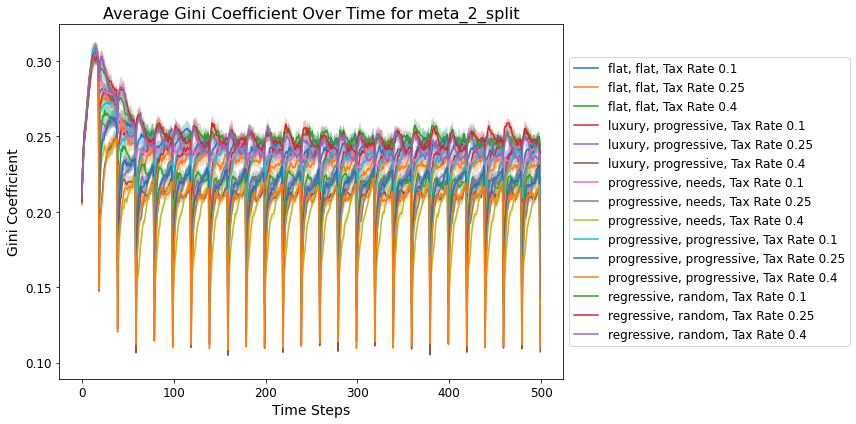

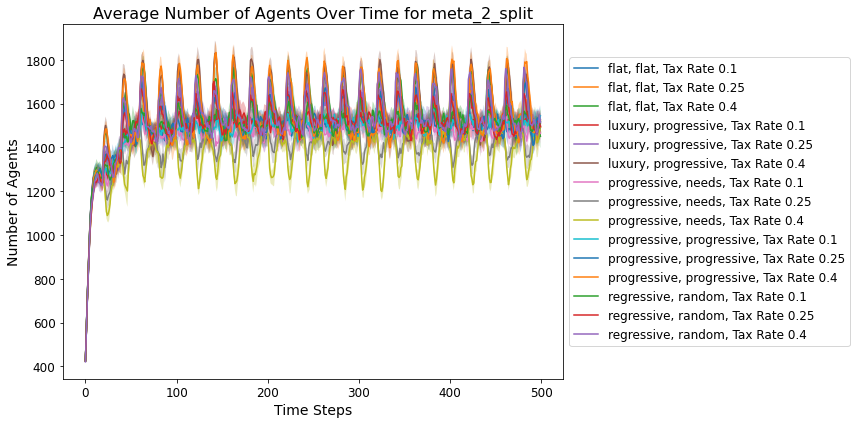

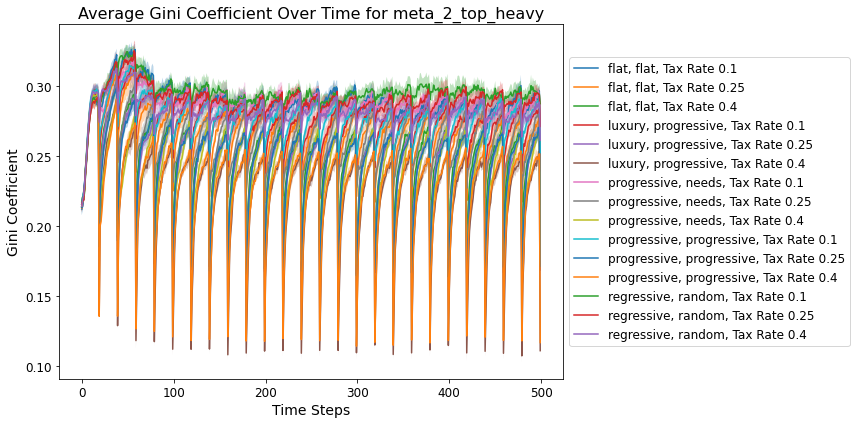

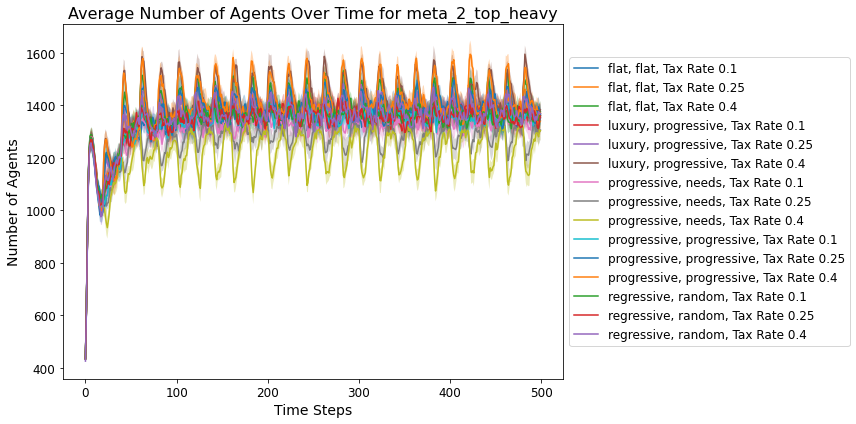

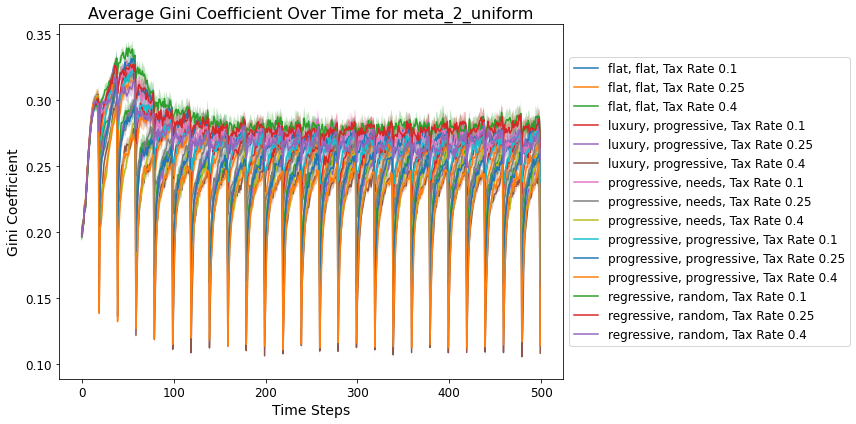

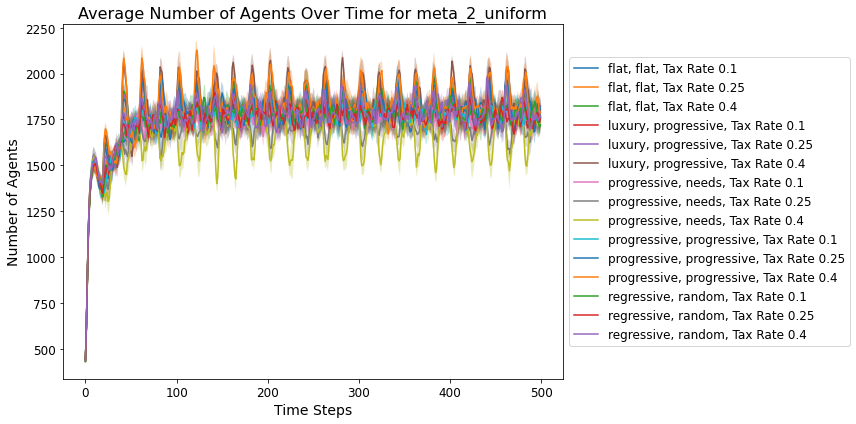

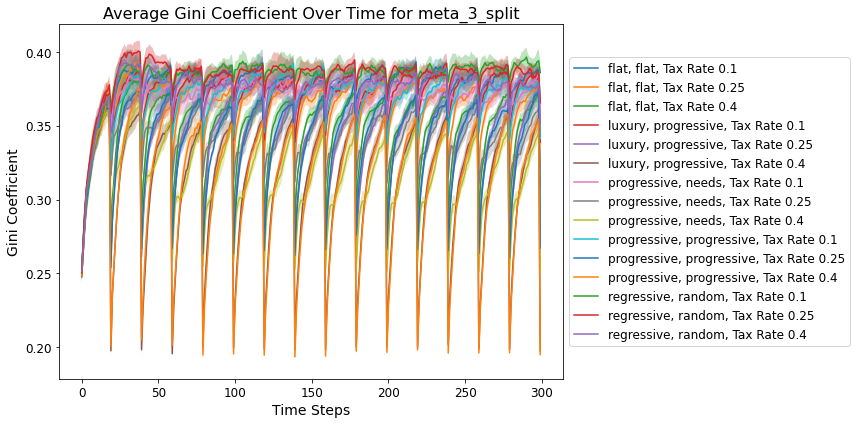

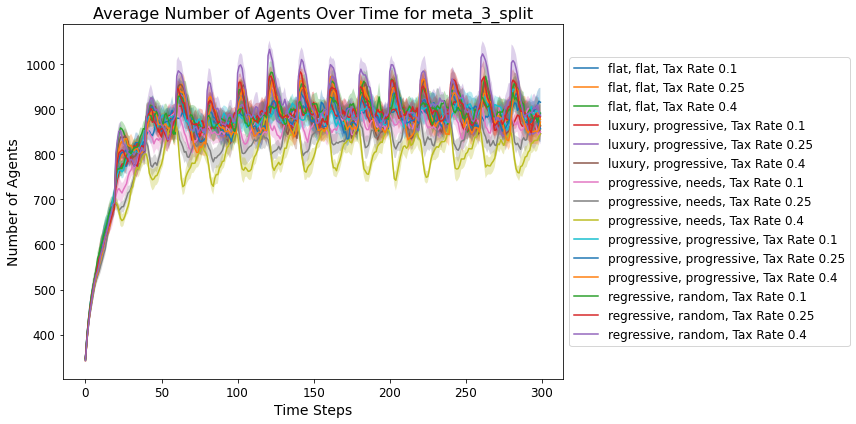

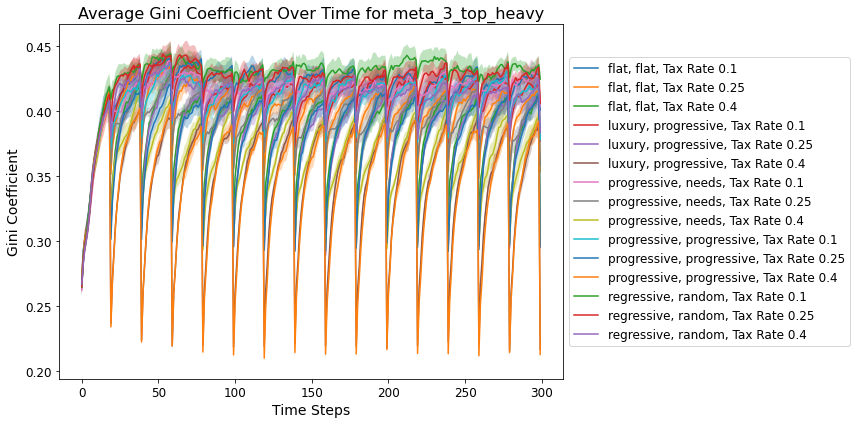

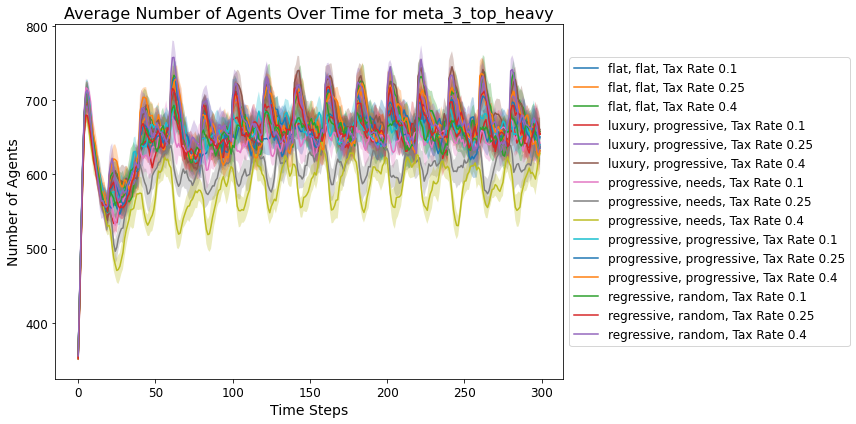

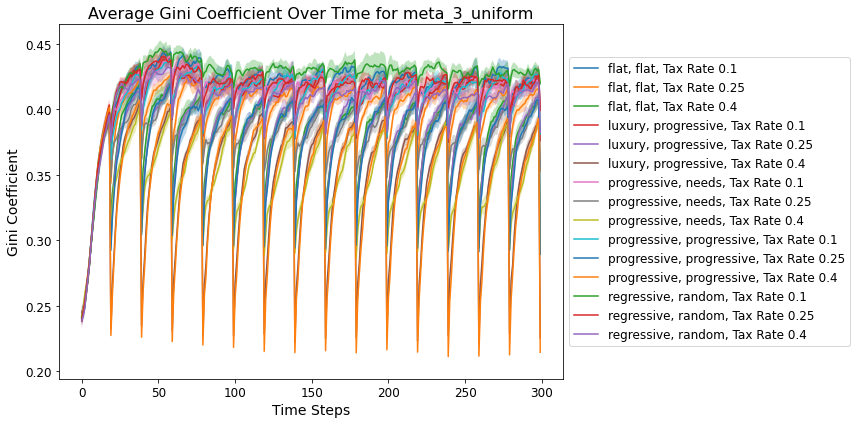

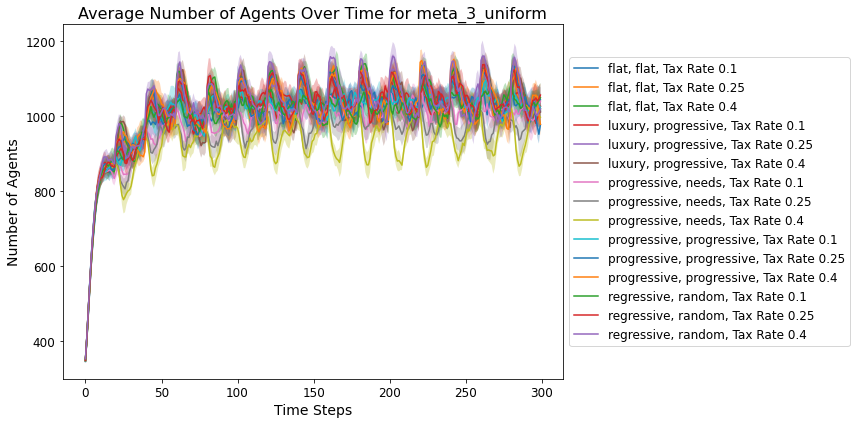

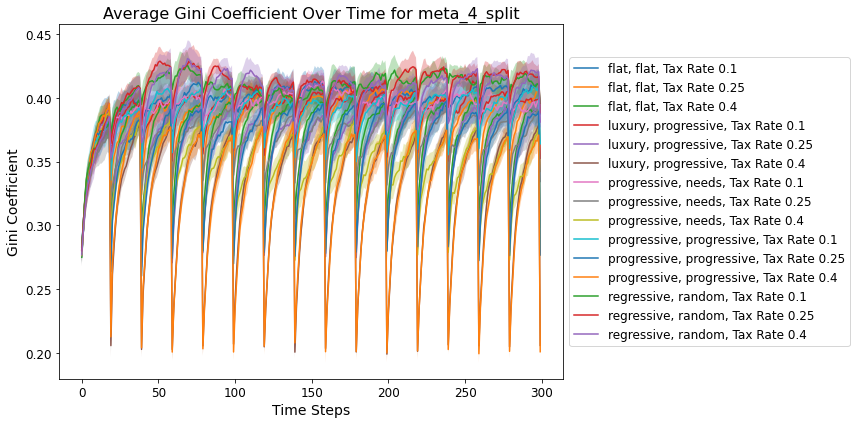

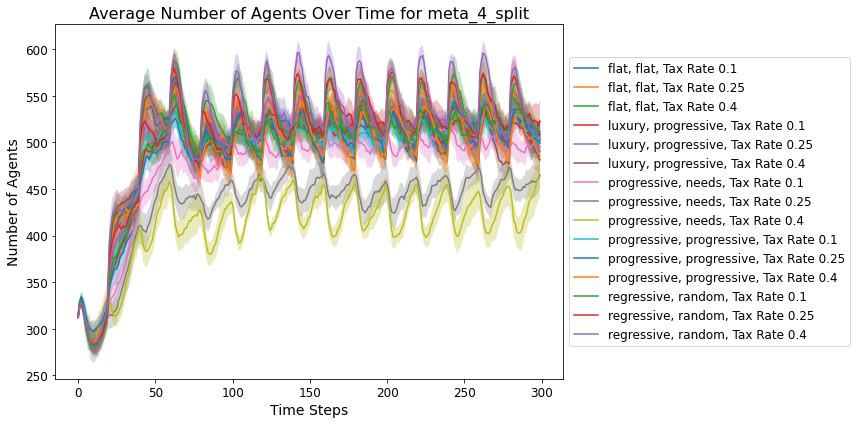

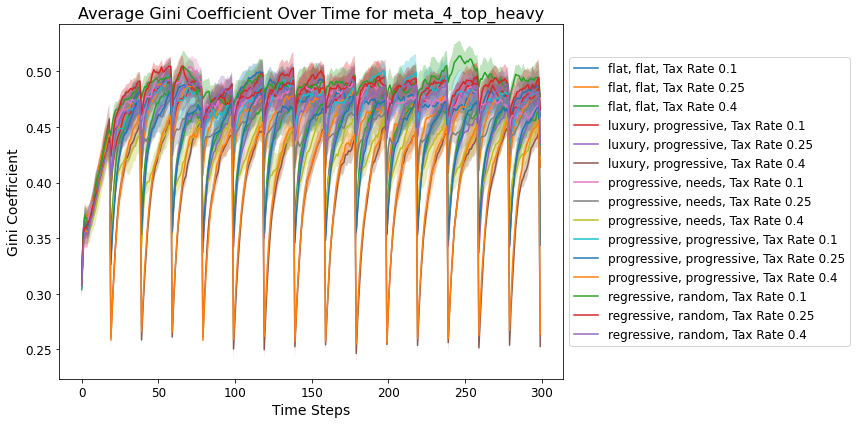

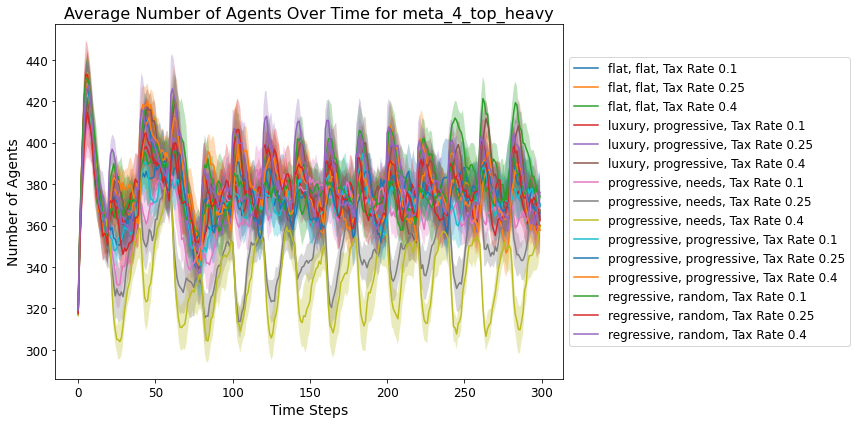

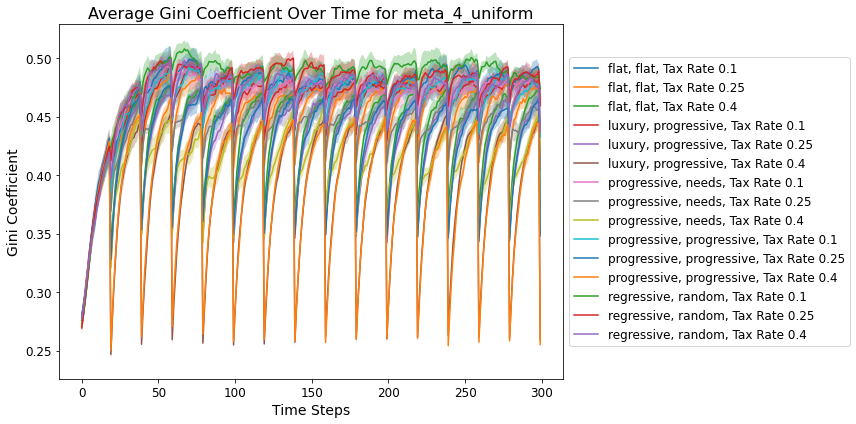

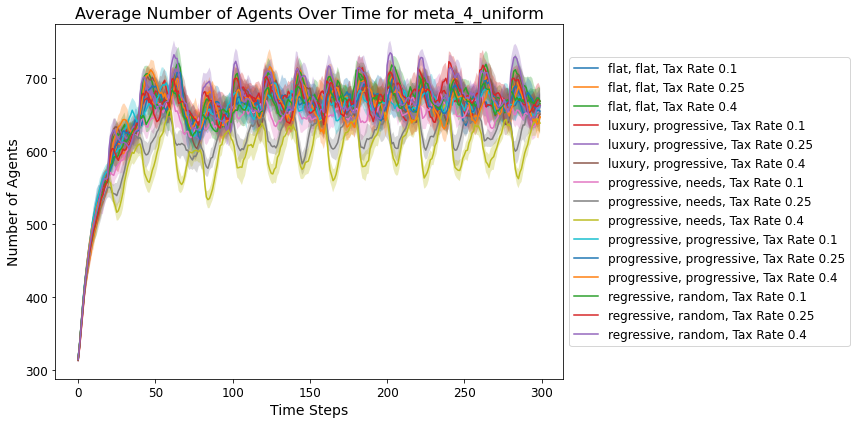

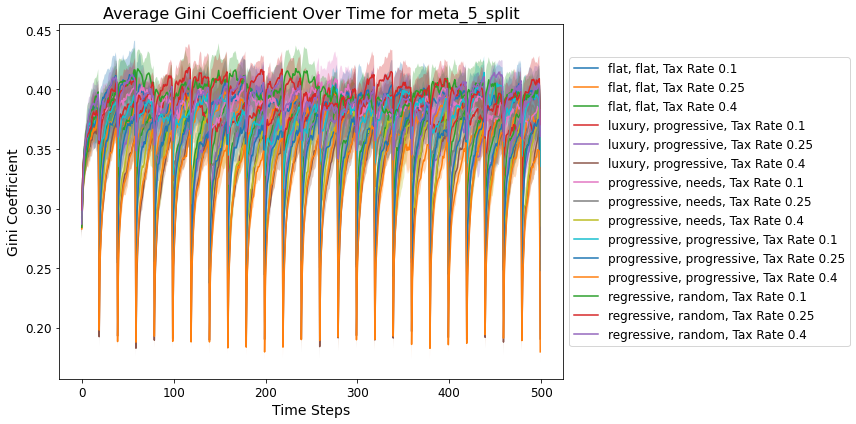

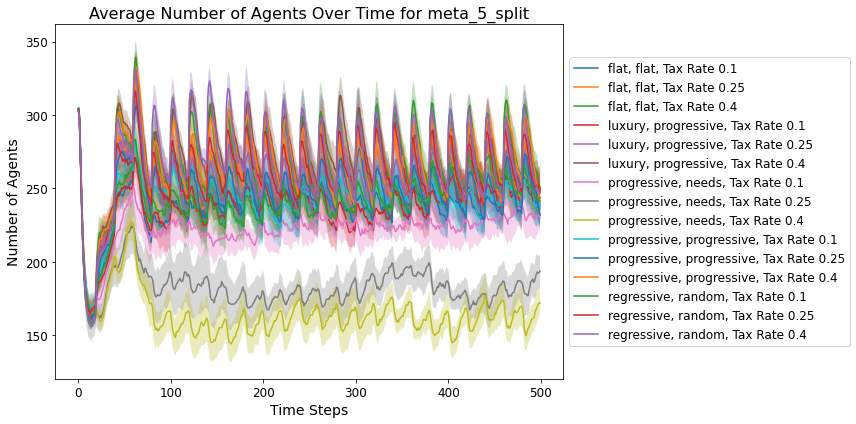

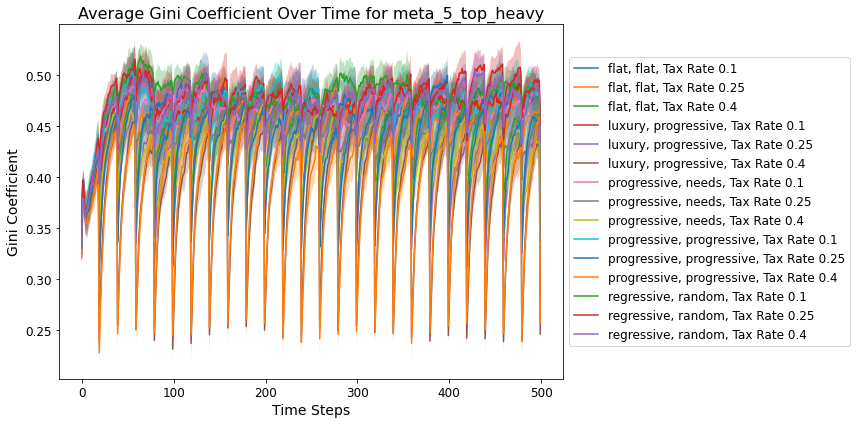

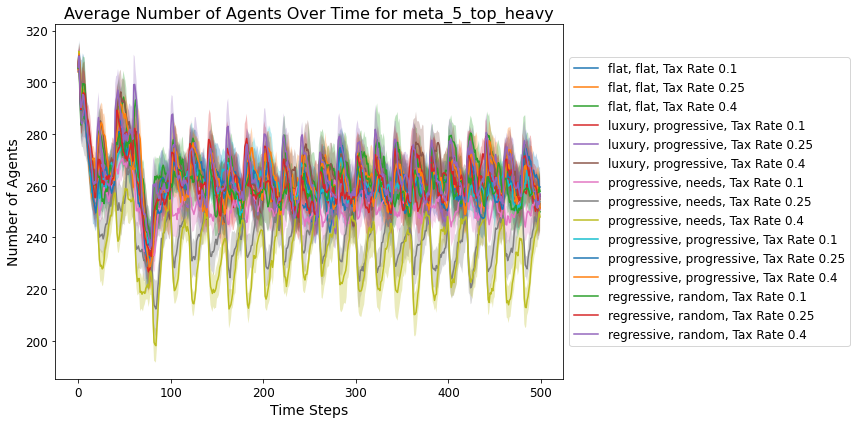

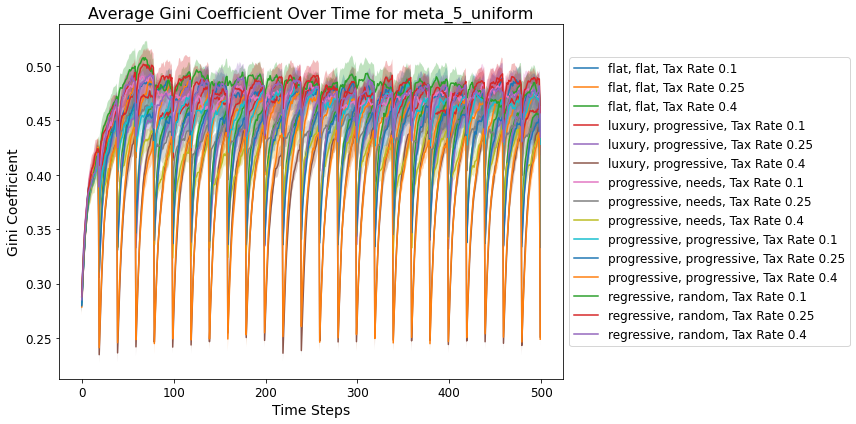

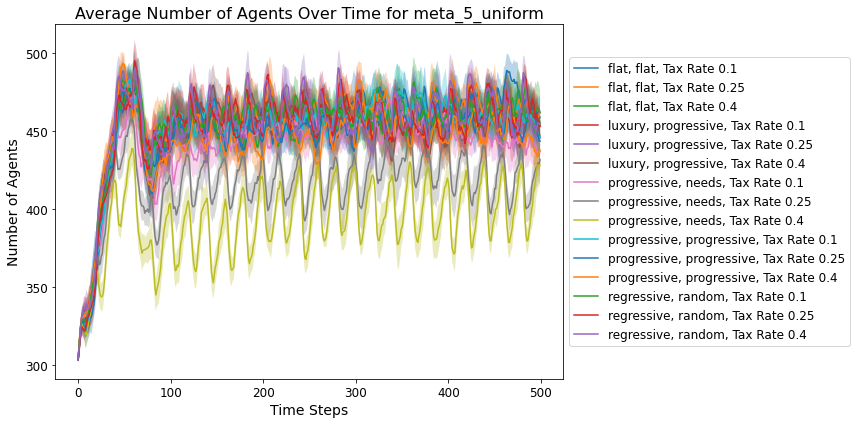

In [2]:
def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Time Steps'] = data['Time Steps'].apply(convert_str_to_list)
    data['Gini Over Time'] = data['Gini Over Time'].apply(convert_str_to_list)
    data['Agents Over Time'] = data['Agents Over Time'].apply(convert_str_to_list)
    
    return data

def plot_results(data, title, metric, y_label, filename):
    """Plot the average and 95% CI of the metric over time and save the plot as an image."""
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    for (tax_scheme, distributer_scheme, tax_rate), group_data in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']):
        time_steps = group_data.iloc[0]['Time Steps']
        values = np.array(group_data[metric].tolist())
        mean_values = np.mean(values, axis=0)
        std_error = np.std(values, axis=0) / np.sqrt(values.shape[0])
        ci95 = 1.96 * std_error

        label = f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}"
        ax.plot(time_steps, mean_values, label=label)
        ax.fill_between(time_steps, mean_values - ci95, mean_values + ci95, alpha=0.3)

    ax.set_xlabel('Time Steps', fontsize=14)
    ax.set_ylabel(y_label, fontsize=14)
    ax.set_title(f'Average {y_label} Over Time for {title}', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    plt.tight_layout()
    plt.savefig(f'plots/{filename}', bbox_inches='tight')
    plt.show()

# Load data from the twelve files
file_paths = [
    'Experimental Results/experiments_results_meta=1_split.csv',
    'Experimental Results/experiments_results_meta=1_top_heavy.csv',
    'Experimental Results/experiments_results_meta=1_uniform.csv',
    'Experimental Results/experiments_results_meta=2_split.csv',
    'Experimental Results/experiments_results_meta=2_top_heavy.csv',
    'Experimental Results/experiments_results_meta=2_uniform.csv',
    'Experimental Results/experiments_results_meta=3_split.csv',
    'Experimental Results/experiments_results_meta=3_top_heavy.csv',
    'Experimental Results/experiments_results_meta=3_uniform.csv',
    'Experimental Results/experiments_results_meta=4_split.csv',
    'Experimental Results/experiments_results_meta=4_top_heavy.csv',
    'Experimental Results/experiments_results_meta=4_uniform.csv',
    'Experimental Results/experiments_results_meta=5_split.csv',
    'Experimental Results/experiments_results_meta=5_top_heavy.csv',
    'Experimental Results/experiments_results_meta=5_uniform.csv'
]

titles = ['meta_1_split', 'meta_1_top_heavy', 'meta_1_uniform',
          'meta_2_split', 'meta_2_top_heavy', 'meta_2_uniform',
          'meta_3_split', 'meta_3_top_heavy', 'meta_3_uniform',
          'meta_4_split', 'meta_4_top_heavy', 'meta_4_uniform',
          'meta_5_split', 'meta_5_top_heavy', 'meta_5_uniform']

all_data = [load_and_process(file_path) for file_path in file_paths]

# Plot results for each file and save the plots
for data, title in zip(all_data, titles):
    plot_results(data, title, 'Gini Over Time', 'Gini Coefficient', f'{title}_gini_over_time.png')
    plot_results(data, title, 'Agents Over Time', 'Number of Agents', f'{title}_agents_over_time.png')


# Boxplot & Statistical Test

Kruskal-Wallis Test for meta_1_split: H-statistic=141.1635496688741, p-value=4.1641461405898267e-23
Significant Comparisons for meta_1_split:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)        100.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)        100.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
92  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
93  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   
94  (progressive, progressive, 0.4)    (regressive, random, 0.4)          0.0   
95        (regressive, random, 0.1)   (regressiv

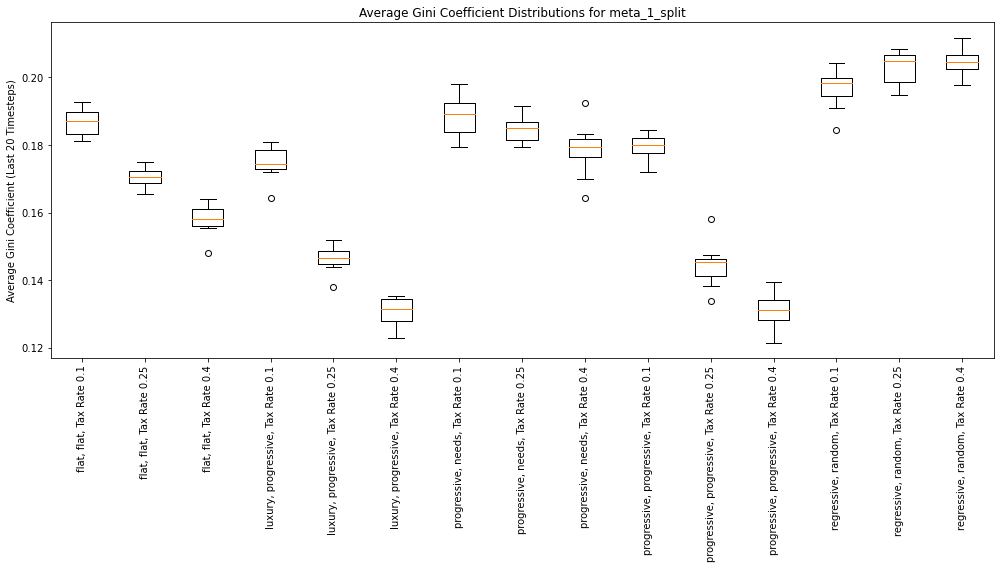

Best combination for meta_1_split:
mean_gini    0.130735
std_gini     0.004299
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_1_top_heavy: H-statistic=120.93350993377487, p-value=4.129816335716172e-19
Significant Comparisons for meta_1_top_heavy:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)            (flat, flat, 0.4)   
1                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
2                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
3                  (flat, flat, 0.1)    (progressive, needs, 0.1)   
4                  (flat, flat, 0.1)   (progressive, needs, 0.25)   
..                               ...                          ...   
74  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
75  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
76   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
77   (progressive, progressive, 

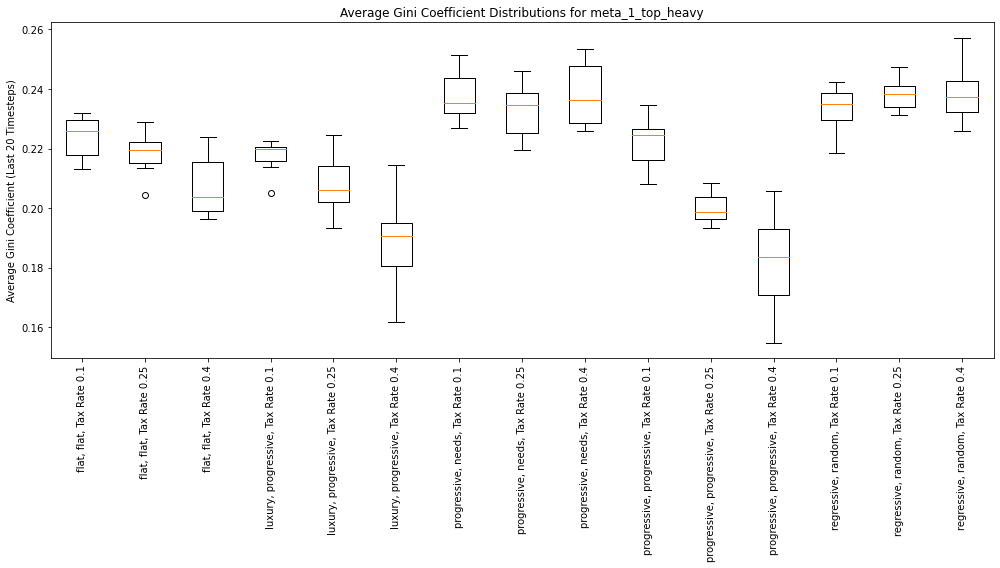

Best combination for meta_1_top_heavy:
mean_gini    0.182185
std_gini     0.015662
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_1_uniform: H-statistic=140.06400000000008, p-value=6.890020224611206e-23
Significant Comparisons for meta_1_uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)        100.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)        100.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
89  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
90  (progressive, progressive, 0.4)   (regressive, random, 0.25)     

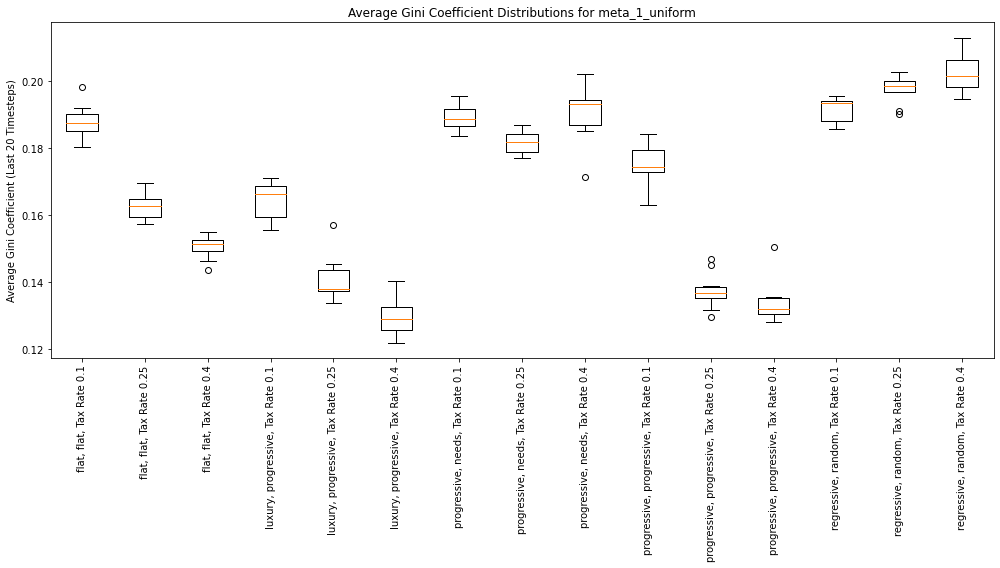

Best combination for meta_1_uniform:
mean_gini    0.129726
std_gini     0.005653
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_2_split: H-statistic=138.1763178807946, p-value=1.6342034523388872e-22
Significant Comparisons for meta_2_split:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)        100.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         81.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
87  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
88  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   

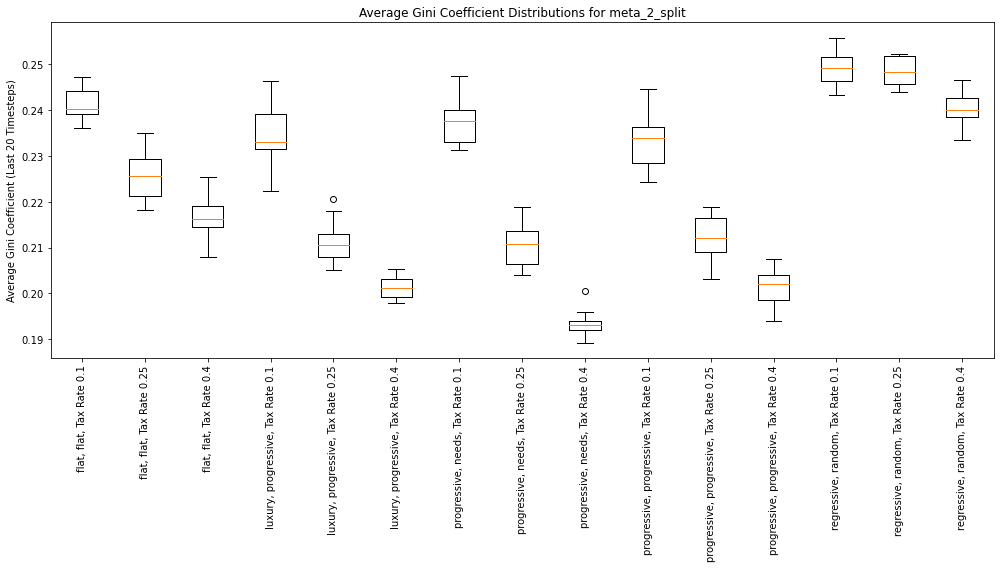

Best combination for meta_2_split:
mean_gini    0.193515
std_gini     0.003030
Name: (progressive, needs, 0.4), dtype: float64
Kruskal-Wallis Test for meta_2_top_heavy: H-statistic=137.67766887417213, p-value=2.0526286884226825e-22
Significant Comparisons for meta_2_top_heavy:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)        100.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         99.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
87  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
88  (progressive, progressive, 0.4)   (regressive, random, 0.25)          

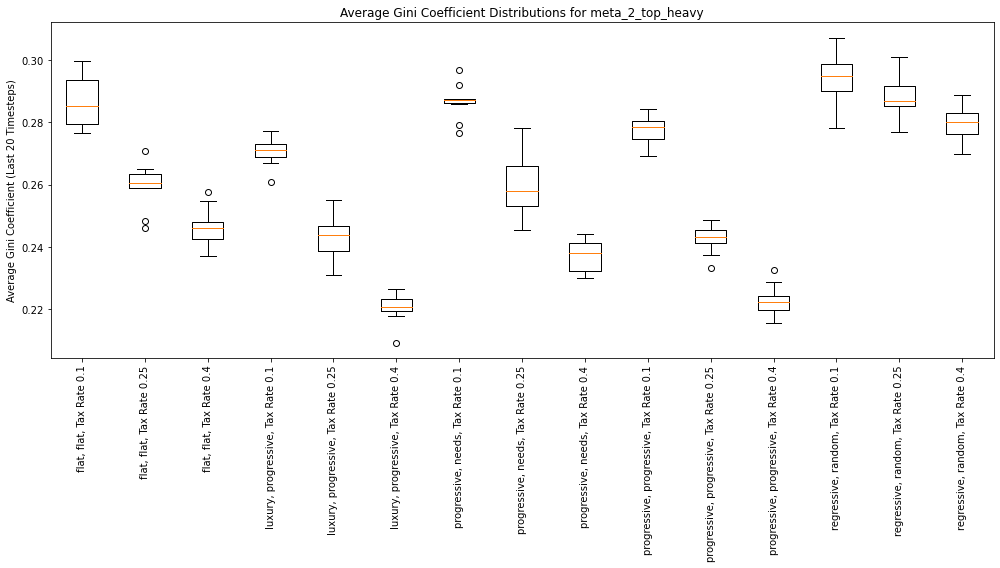

Best combination for meta_2_top_heavy:
mean_gini    0.220518
std_gini     0.004765
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_2_uniform: H-statistic=137.7753642384106, p-value=1.962980871125788e-22
Significant Comparisons for meta_2_uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         98.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         86.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
88  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
89  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0

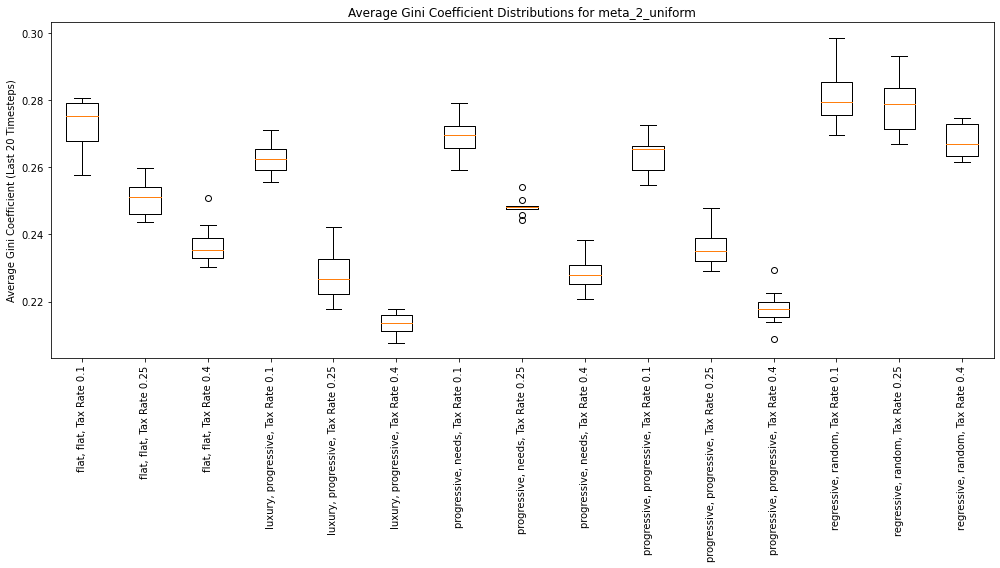

Best combination for meta_2_uniform:
mean_gini    0.213482
std_gini     0.003143
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_3_split: H-statistic=133.8369271523179, p-value=1.1850677064997085e-21
Significant Comparisons for meta_3_split:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         94.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
3                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
4                 (flat, flat, 0.1)    (progressive, needs, 0.1)         79.0   
..                              ...                          ...          ...   
81  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
82  (progressive, progressive, 0.4)   (regressive, random, 0.25)          0.0   

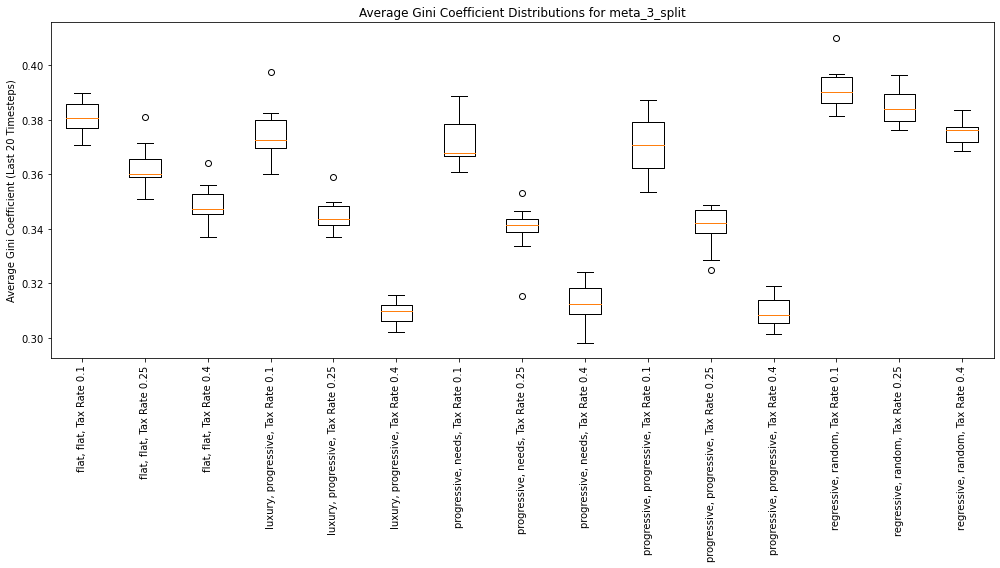

Best combination for meta_3_split:
mean_gini    0.309059
std_gini     0.004351
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_3_top_heavy: H-statistic=132.14368211920532, p-value=2.563178890732327e-21
Significant Comparisons for meta_3_top_heavy:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)        100.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         89.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
85  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
86  (progressive, progressive, 0.4)   (regressive, random, 0.25)          

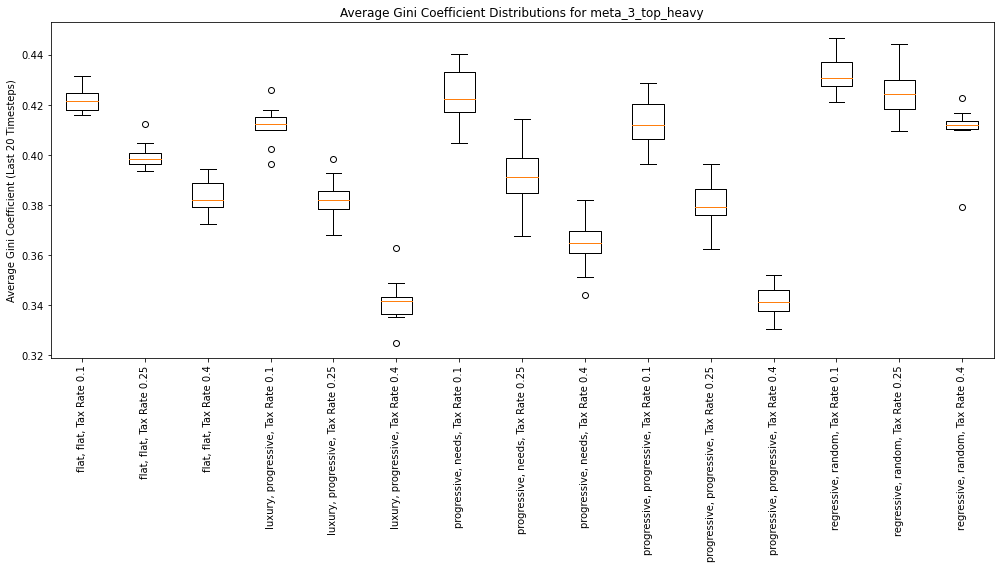

Best combination for meta_3_top_heavy:
mean_gini    0.341636
std_gini     0.006506
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_3_uniform: H-statistic=135.28826490066217, p-value=6.112954006465662e-22
Significant Comparisons for meta_3_uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         96.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
3                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
4                 (flat, flat, 0.1)   (progressive, needs, 0.25)        100.0   
..                              ...                          ...          ...   
83  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
84  (progressive, progressive, 0.4)   (regressive, random, 0.25)     

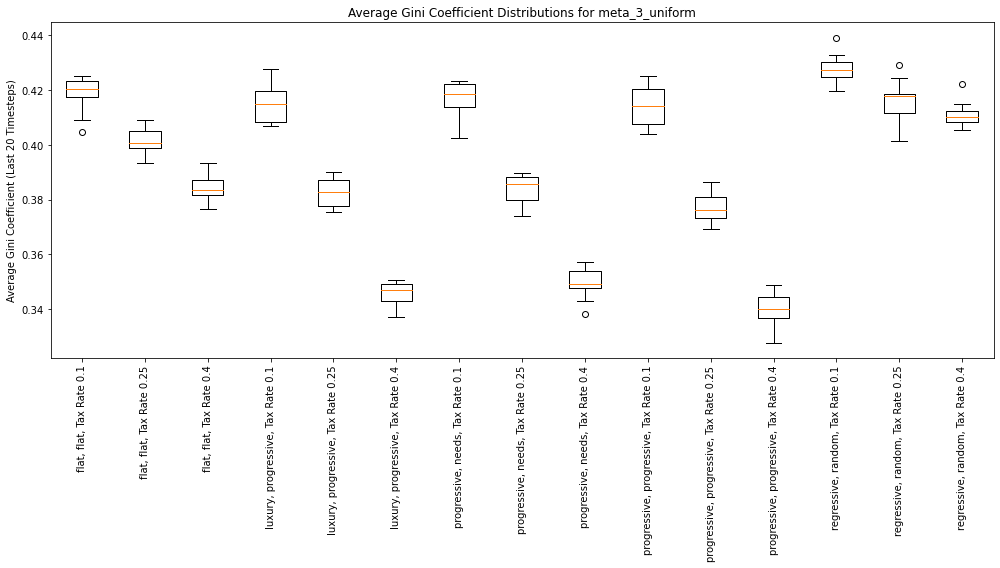

Best combination for meta_3_uniform:
mean_gini    0.339855
std_gini     0.006607
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_4_split: H-statistic=118.54982781456954, p-value=1.209461463715698e-18
Significant Comparisons for meta_4_split:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)           (flat, flat, 0.25)   
1                  (flat, flat, 0.1)            (flat, flat, 0.4)   
2                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
3                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
4                  (flat, flat, 0.1)   (progressive, needs, 0.25)   
..                               ...                          ...   
76  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
77  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
78   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
79   (progressive, progressive, 0

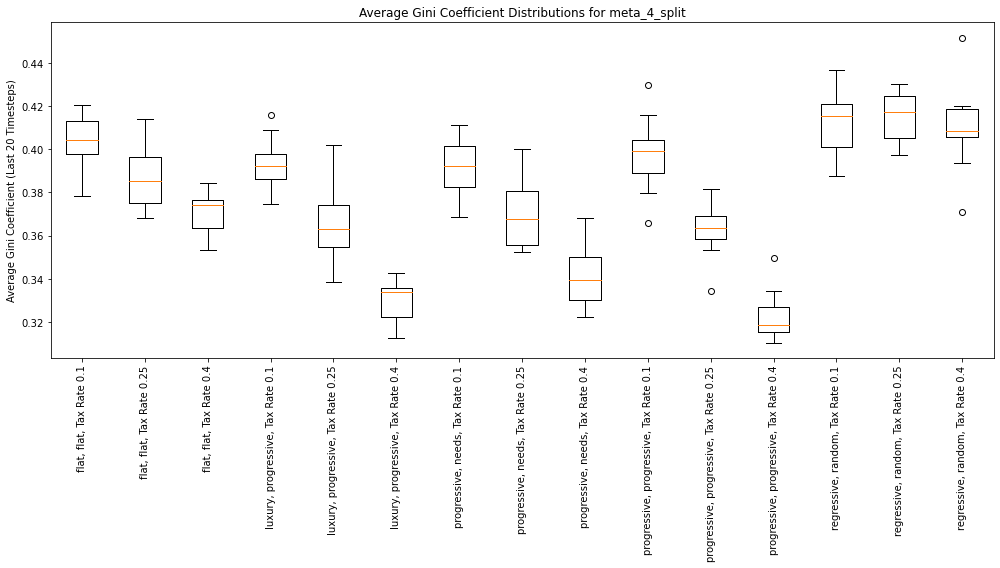

Best combination for meta_4_split:
mean_gini    0.322789
std_gini     0.011940
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_4_top_heavy: H-statistic=108.76588079470207, p-value=9.703747452525018e-17
Significant Comparisons for meta_4_top_heavy:
                       combination_1                     combination_2  \
0                  (flat, flat, 0.1)                 (flat, flat, 0.4)   
1                  (flat, flat, 0.1)       (luxury, progressive, 0.25)   
2                  (flat, flat, 0.1)        (luxury, progressive, 0.4)   
3                  (flat, flat, 0.1)         (progressive, needs, 0.4)   
4                  (flat, flat, 0.1)  (progressive, progressive, 0.25)   
..                               ...                               ...   
67  (progressive, progressive, 0.25)         (regressive, random, 0.4)   
68   (progressive, progressive, 0.4)         (regressive, random, 0.1)   
69   (progressive, progressive, 0.4)        (regres

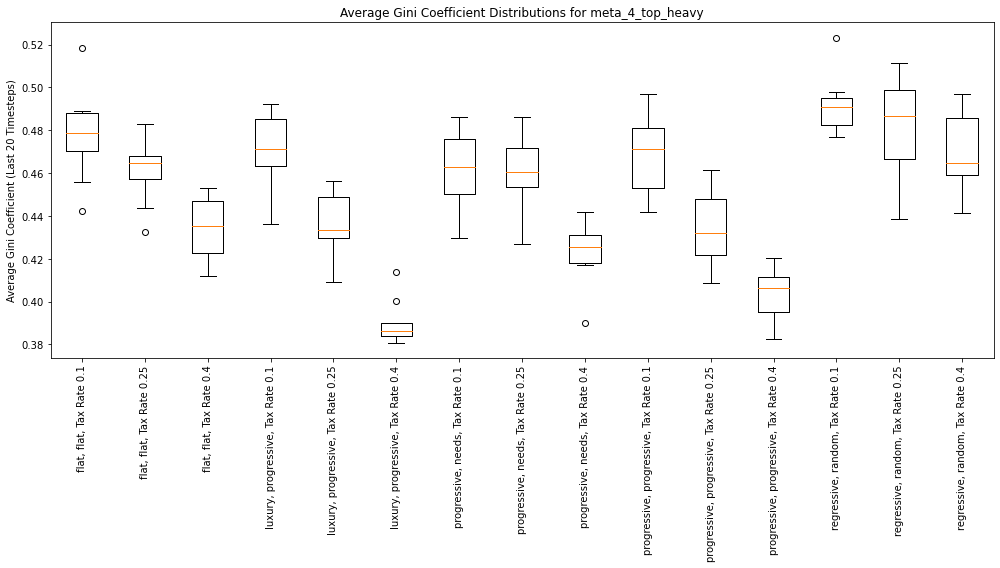

Best combination for meta_4_top_heavy:
mean_gini    0.389903
std_gini     0.009980
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_4_uniform: H-statistic=132.92598675496686, p-value=1.794891314553823e-21
Significant Comparisons for meta_4_uniform:
                      combination_1                combination_2  u_statistic  \
0                 (flat, flat, 0.1)           (flat, flat, 0.25)         99.0   
1                 (flat, flat, 0.1)            (flat, flat, 0.4)        100.0   
2                 (flat, flat, 0.1)   (luxury, progressive, 0.1)         80.0   
3                 (flat, flat, 0.1)  (luxury, progressive, 0.25)        100.0   
4                 (flat, flat, 0.1)   (luxury, progressive, 0.4)        100.0   
..                              ...                          ...          ...   
86  (progressive, progressive, 0.4)    (regressive, random, 0.1)          0.0   
87  (progressive, progressive, 0.4)   (regressive, random, 0.25)          

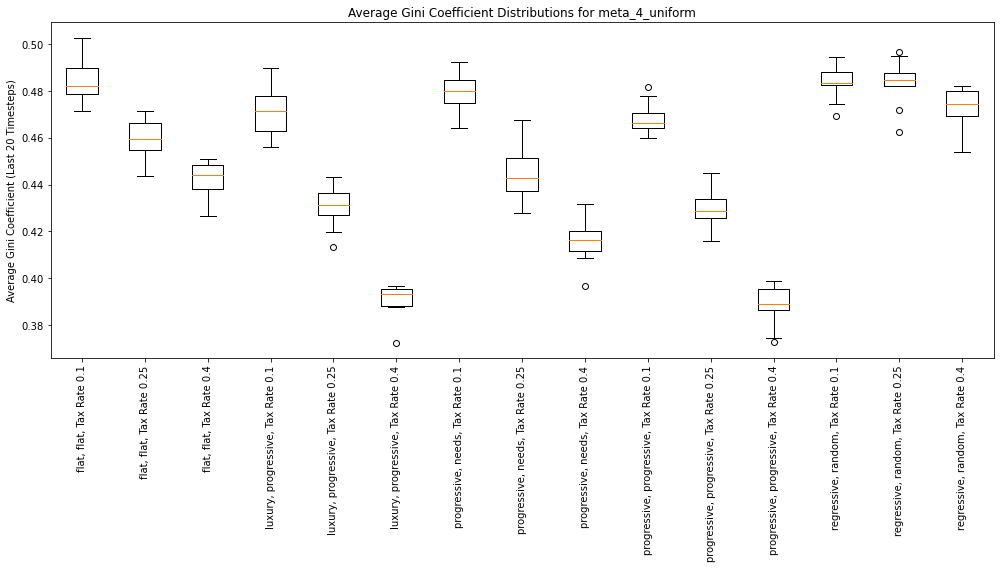

Best combination for meta_4_uniform:
mean_gini    0.388186
std_gini     0.008903
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_5_split: H-statistic=99.63136423841058, p-value=5.580002277270451e-15
Significant Comparisons for meta_5_split:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)           (flat, flat, 0.25)   
1                  (flat, flat, 0.1)            (flat, flat, 0.4)   
2                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
3                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
4                  (flat, flat, 0.1)    (progressive, needs, 0.4)   
..                               ...                          ...   
64  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
65  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
66   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
67   (progressive, progressive, 0.

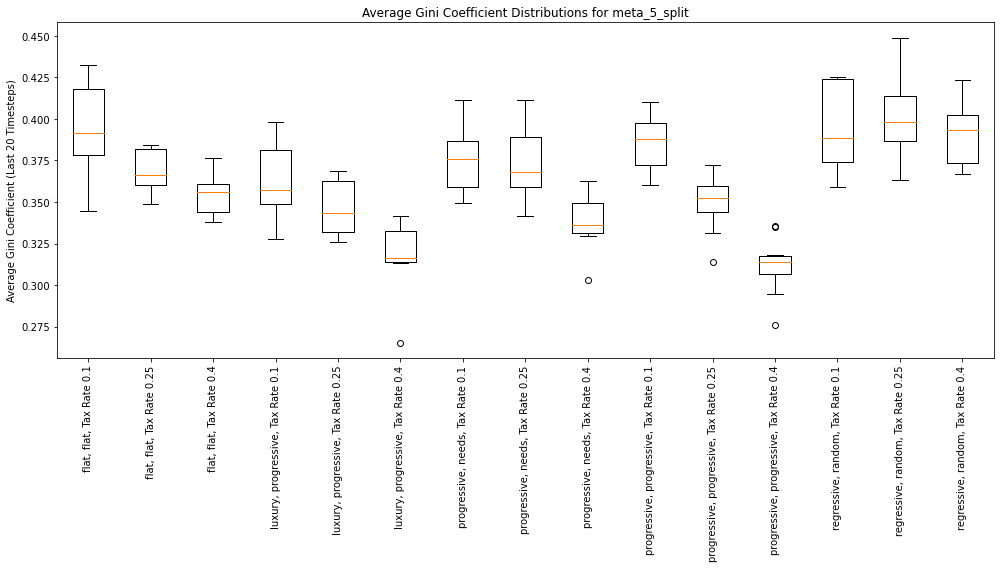

Best combination for meta_5_split:
mean_gini    0.311590
std_gini     0.017503
Name: (progressive, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_5_top_heavy: H-statistic=94.91284768211915, p-value=4.442638131211423e-14
Significant Comparisons for meta_5_top_heavy:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)            (flat, flat, 0.4)   
1                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
2                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
3                  (flat, flat, 0.1)   (progressive, needs, 0.25)   
4                  (flat, flat, 0.1)    (progressive, needs, 0.4)   
..                               ...                          ...   
61  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
62  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
63   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
64   (progressive, progressi

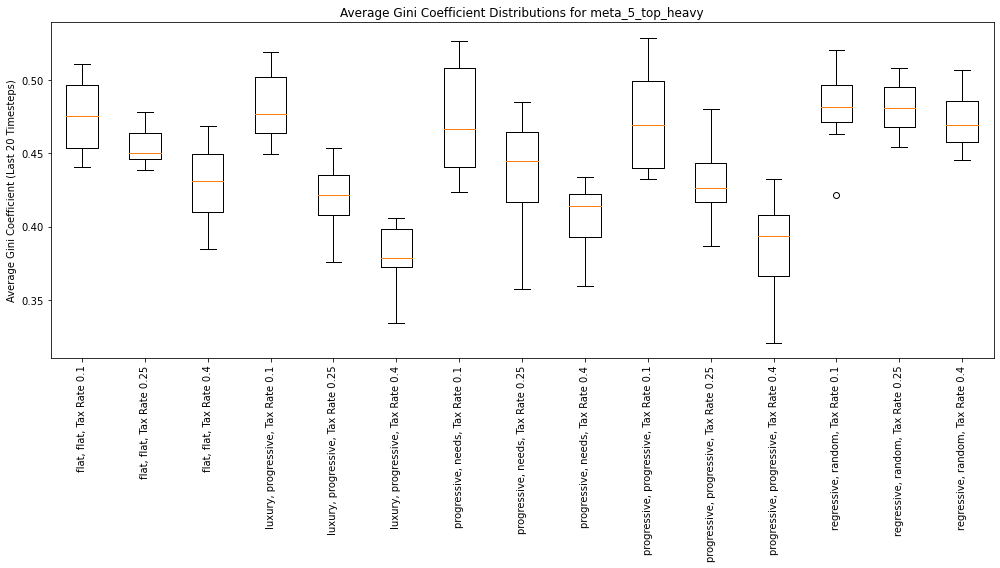

Best combination for meta_5_top_heavy:
mean_gini    0.380545
std_gini     0.021990
Name: (luxury, progressive, 0.4), dtype: float64
Kruskal-Wallis Test for meta_5_uniform: H-statistic=108.46177483443716, p-value=1.1112810011192624e-16
Significant Comparisons for meta_5_uniform:
                       combination_1                combination_2  \
0                  (flat, flat, 0.1)            (flat, flat, 0.4)   
1                  (flat, flat, 0.1)  (luxury, progressive, 0.25)   
2                  (flat, flat, 0.1)   (luxury, progressive, 0.4)   
3                  (flat, flat, 0.1)   (progressive, needs, 0.25)   
4                  (flat, flat, 0.1)    (progressive, needs, 0.4)   
..                               ...                          ...   
67  (progressive, progressive, 0.25)   (regressive, random, 0.25)   
68  (progressive, progressive, 0.25)    (regressive, random, 0.4)   
69   (progressive, progressive, 0.4)    (regressive, random, 0.1)   
70   (progressive, progressive,

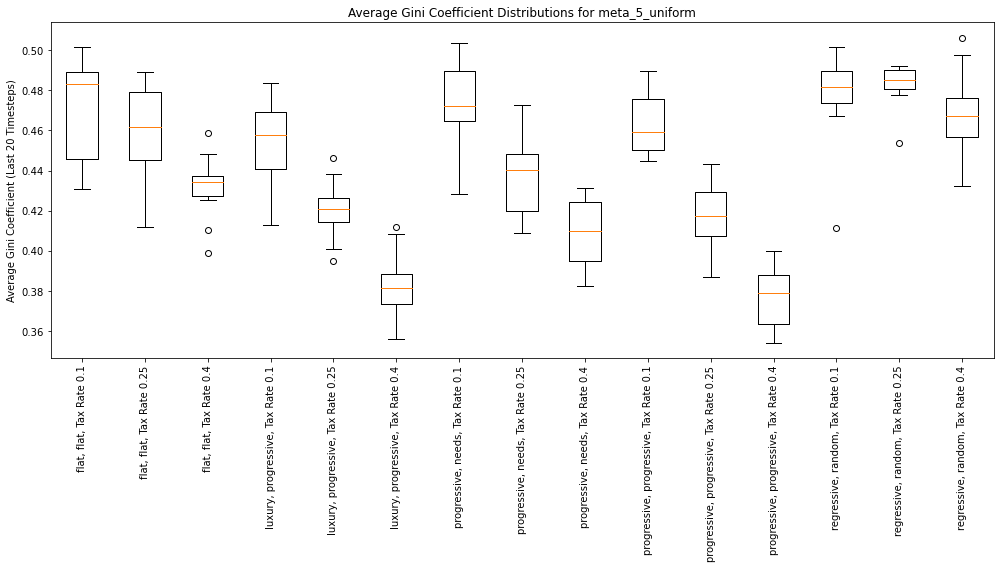

Best combination for meta_5_uniform:
mean_gini    0.376495
std_gini     0.015303
Name: (progressive, progressive, 0.4), dtype: float64


In [3]:

def load_and_process(file_path):
    """Load CSV file and process the data."""
    data = pd.read_csv(file_path)
    
    def convert_str_to_list(list_str):
        list_str = list_str.strip('[]')
        list_str = list_str.split(',')
        return [float(x.strip()) for x in list_str]

    # Apply the conversion to the relevant columns
    data['Gini Over Time'] = data['Gini Over Time'].apply(convert_str_to_list)
    
    return data

def summarize_significant_results(results):
    """Summarize significant comparisons with p-values."""
    significant_results = [res for res in results if res['p_value'] < 0.05]
    summary = pd.DataFrame(significant_results)
    return summary

def visualize_gini_distributions(data, title):
    """Visualize Gini coefficient distributions using box plots."""
    fig, ax = plt.subplots(figsize=(14, 8))
    data_to_plot = []
    labels = []

    for (tax_scheme, distributer_scheme, tax_rate), group_data in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']):
        final_gini = [np.mean(gini[-20:]) for gini in group_data['Gini Over Time']]
        data_to_plot.append(final_gini)
        labels.append(f"{tax_scheme}, {distributer_scheme}, Tax Rate {tax_rate}")

    ax.boxplot(data_to_plot)
    ax.set_xticklabels(labels, rotation=90)
    ax.set_ylabel('Average Gini Coefficient (Last 20 Timesteps)')
    ax.set_title(f'Average Gini Coefficient Distributions for {title}')
    plt.tight_layout()
    plt.show()

def identify_best_combination(data, title):
    """Identify the best combination for reducing Gini coefficient."""
    summary = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).agg(
        mean_gini=('Final Gini', 'mean'),
        std_gini=('Final Gini', 'std')
    ).sort_values(by='mean_gini')
    
    best_combination = summary.iloc[0]
    print(f"Best combination for {title}:")
    print(best_combination)

# Load data from the twelve files
file_paths = [
    'Experimental Results/experiments_results_meta=1_split.csv',
    'Experimental Results/experiments_results_meta=1_top_heavy.csv',
    'Experimental Results/experiments_results_meta=1_uniform.csv',
    'Experimental Results/experiments_results_meta=2_split.csv',
    'Experimental Results/experiments_results_meta=2_top_heavy.csv',
    'Experimental Results/experiments_results_meta=2_uniform.csv',
    'Experimental Results/experiments_results_meta=3_split.csv',
    'Experimental Results/experiments_results_meta=3_top_heavy.csv',
    'Experimental Results/experiments_results_meta=3_uniform.csv',
    'Experimental Results/experiments_results_meta=4_split.csv',
    'Experimental Results/experiments_results_meta=4_top_heavy.csv',
    'Experimental Results/experiments_results_meta=4_uniform.csv',
    'Experimental Results/experiments_results_meta=5_split.csv',
    'Experimental Results/experiments_results_meta=5_top_heavy.csv',
    'Experimental Results/experiments_results_meta=5_uniform.csv'
]

titles = ['meta_1_split', 'meta_1_top_heavy', 'meta_1_uniform',
          'meta_2_split', 'meta_2_top_heavy', 'meta_2_uniform',
          'meta_3_split', 'meta_3_top_heavy', 'meta_3_uniform',
          'meta_4_split', 'meta_4_top_heavy', 'meta_4_uniform',
          'meta_5_split', 'meta_5_top_heavy', 'meta_5_uniform']

all_data = [load_and_process(file_path) for file_path in file_paths]

# Perform analysis for each map
for data, title in zip(all_data, titles):
    # Get the average Gini coefficient for the last 20 timesteps for each run
    data['Final Gini'] = data['Gini Over Time'].apply(lambda x: np.mean(x[-20:]))
    
    # Perform Kruskal-Wallis test
    group_data = [group['Final Gini'].values for name, group in data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate'])]
    kruskal_result = kruskal(*group_data)
    print(f"Kruskal-Wallis Test for {title}: H-statistic={kruskal_result.statistic}, p-value={kruskal_result.pvalue}")
    
    # If significant, perform pairwise comparisons
    results = []
    if kruskal_result.pvalue < 0.05:
        combinations = data.groupby(['Tax Scheme', 'Distributer Scheme', 'Tax Rate']).groups.keys()
        combinations = list(combinations)
        for i in range(len(combinations)):
            for j in range(i+1, len(combinations)):
                group1 = data[(data['Tax Scheme'] == combinations[i][0]) & 
                              (data['Distributer Scheme'] == combinations[i][1]) & 
                              (data['Tax Rate'] == combinations[i][2])]['Final Gini'].values
                group2 = data[(data['Tax Scheme'] == combinations[j][0]) & 
                              (data['Distributer Scheme'] == combinations[j][1]) & 
                              (data['Tax Rate'] == combinations[j][2])]['Final Gini'].values
                u_statistic, p_value = mannwhitneyu(group1, group2)
                results.append({
                    'combination_1': combinations[i],
                    'combination_2': combinations[j],
                    'u_statistic': u_statistic,
                    'p_value': p_value
                })

    # Summarize significant results
    summary = summarize_significant_results(results)
    print(f"Significant Comparisons for {title}:")
    print(summary)
    
    # Visualize Gini coefficient distributions
    visualize_gini_distributions(data, title)
    
    # Identify the best combination for reducing Gini coefficient
    identify_best_combination(data, title)
